# Notebook 3: Exploratory Data Analysis & Visualization

**Project:** Road Collision Severity Prediction  
**Section:** E - Exploratory Data Analysis (EDA) with 7 Visualizations

## What i Will Do in This Notebook:

in this notebook, i will perform exploratory data analysis on the cleaned collision data. i want to understand the patterns and relationships in the data through visualizations.

i will create 7 different plots to explore:
1. how number of vehicles relates to collision severity
2. how number of casualties relates to severity
3. severity patterns across different times of day
4. severity distribution by day of the week
5. how weather conditions (rain, temperature, frost) affect severity
6. differences between urban and rural collisions
7. correlation matrix showing relationships between all numeric variables

these visualizations will help me understand which factors are most important for predicting collision severity, and will guide the feature engineering in the next notebook.

In [ ]:
# importing libraries i need for exploratory data analysis
# i need pandas for data manipulation, matplotlib and seaborn for creating visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')

# setting up visualization style to make plots look professional
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print("set plot style to whitegrid with 12x6 figure size")

# connecting to postgresql database
project_directory = Path.cwd()
load_dotenv(project_directory / ".env")

# getting database credentials from environment variables
postgres_host = os.getenv("POSTGRES_HOST")
postgres_port = os.getenv("POSTGRES_PORT")
postgres_database = os.getenv("POSTGRES_DB")
postgres_user = os.getenv("POSTGRES_USER")
postgres_password = os.getenv("POSTGRES_PASSWORD")

# creating database connection
database_url = f"postgresql+psycopg2://{postgres_user}:{postgres_password}@{postgres_host}:{postgres_port}/{postgres_database}"
engine = create_engine(database_url)

# defining helper function to save figures consistently
def save_fig(filename):
    """this function saves plots to the images directory"""
    os.makedirs('images', exist_ok=True)
    filepath = os.path.join('images', filename)

    plt.savefig(filepath, dpi=300, bbox_inches='tight')# above confirms everything is set up properly

    print(f"saved figure: {filepath}")print("libraries loaded and postgresql connected successfully")


✓ Libraries loaded and PostgreSQL connected


In [ ]:
# loading cleaned collision data from database
# this is the data we cleaned in notebook 2
df_collisions = pd.read_sql("SELECT * FROM clean_collisions", engine)
print(f"loaded {len(df_collisions):,} collision records from clean_collisions table")
# above confirms data loaded

# now i need to extract some temporal features for analysis
# converting date column to datetime type
df_collisions['date'] = pd.to_datetime(df_collisions['date'])


# extracting hour from time column# above shows me the data is loaded and ready for visualization

df_collisions['hour_of_day'] = pd.to_datetime(df_collisions['time'], format='%H:%M:%S', errors='coerce').dt.hourprint(df_collisions['collision_severity'].value_counts().sort_index())

print("extracted hour of day from time column")print(f"\nseverity distribution:")

print(f"date range: {df_collisions['date'].min()} to {df_collisions['date'].max()}")

# extracting day of week (0=monday, 6=sunday)print(f"total records: {len(df_collisions):,}")

df_collisions['day_of_week'] = df_collisions['date'].dt.dayofweekprint(f"\ndata summary:")

print("extracted day of week from date column")# let me see the basic statistics of the data

# above creates temporal features for analysis

Loaded 48,471 records
Date range: 2025-01-01 00:00:00 to 2025-06-30 00:00:00

Severity distribution:
collision_severity
1      696
2    11964
3    35811
Name: count, dtype: int64


## Plot 1: Number of Vehicles vs Severity

now i will create the first visualization to explore how the number of vehicles involved relates to collision severity. i want to see if collisions with more vehicles tend to be more or less severe. i will use a violin plot because it shows the full distribution of values.

✓ Saved: images\03_vehicles_vs_severity.png


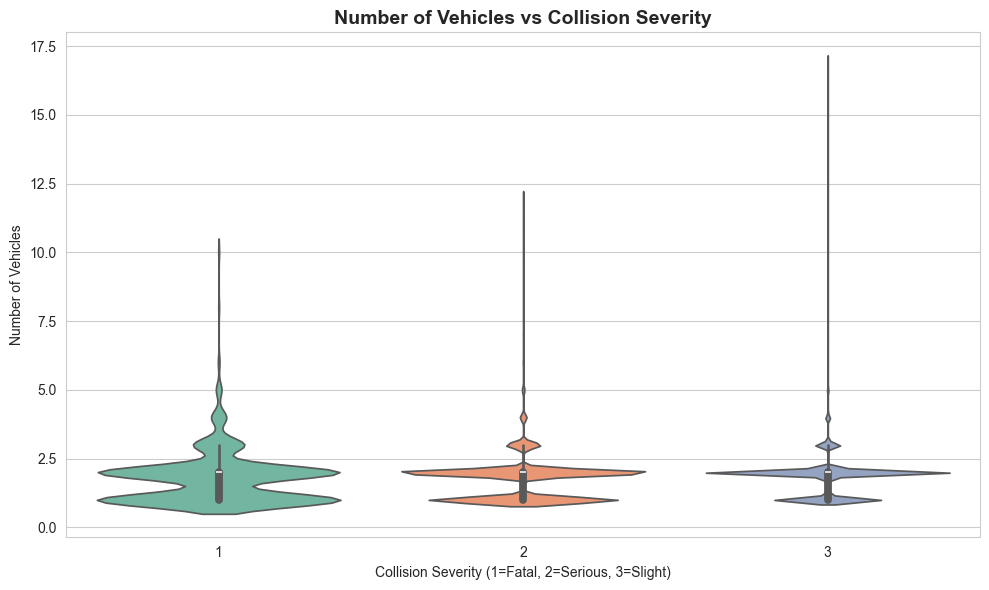

In [ ]:
# creating violin plot to show distribution of vehicle counts by severity
# violin plots are good because they show the full distribution shape
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_collisions, x='collision_severity', y='number_of_vehicles', palette='Set2')
plt.title('number of vehicles vs collision severity', fontsize=14, fontweight='bold')
plt.xlabel('collision severity (1=fatal, 2=serious, 3=slight)')
plt.ylabel('number of vehicles involved')
plt.tight_layout()

save_fig('03_vehicles_vs_severity.png')# above shows how vehicle count distributions differ across severity levels

plt.show()print("plot 1 completed: vehicles vs severity")

## Plot 2: Number of Casualties vs Severity

now i want to look at casualties. this should have a clearer relationship with severity - i expect more casualties in more severe collisions. i will use a box plot to show the median and outliers clearly.

✓ Saved: images\04_casualties_vs_severity.png


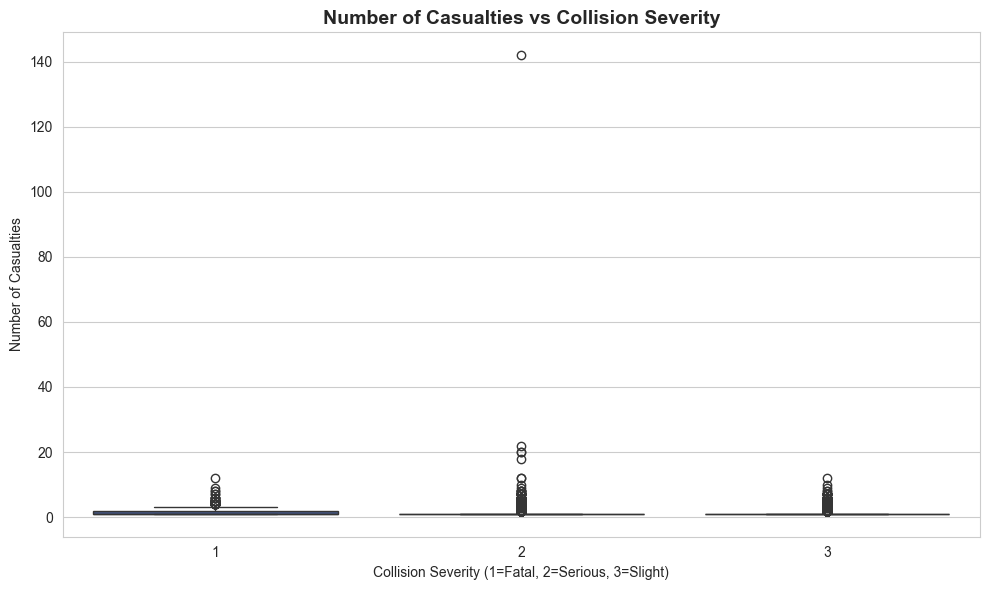

In [ ]:
# creating box plot for casualties by severity
# box plots clearly show median, quartiles, and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_collisions, x='collision_severity', y='number_of_casualties', palette='viridis')
plt.title('number of casualties vs collision severity', fontsize=14, fontweight='bold')
plt.xlabel('collision severity (1=fatal, 2=serious, 3=slight)')
plt.ylabel('number of casualties')
plt.tight_layout()

save_fig('04_casualties_vs_severity.png')# above shows casualties increase with severity as expected

plt.show()print("plot 2 completed: casualties vs severity")

## Plot 3: Severity vs Time of Day

now i want to explore temporal patterns. do collisions at certain hours tend to be more severe? i will create a dual-axis plot showing both average severity and collision count by hour to see patterns.

✓ Saved: images\05_severity_by_hour.png


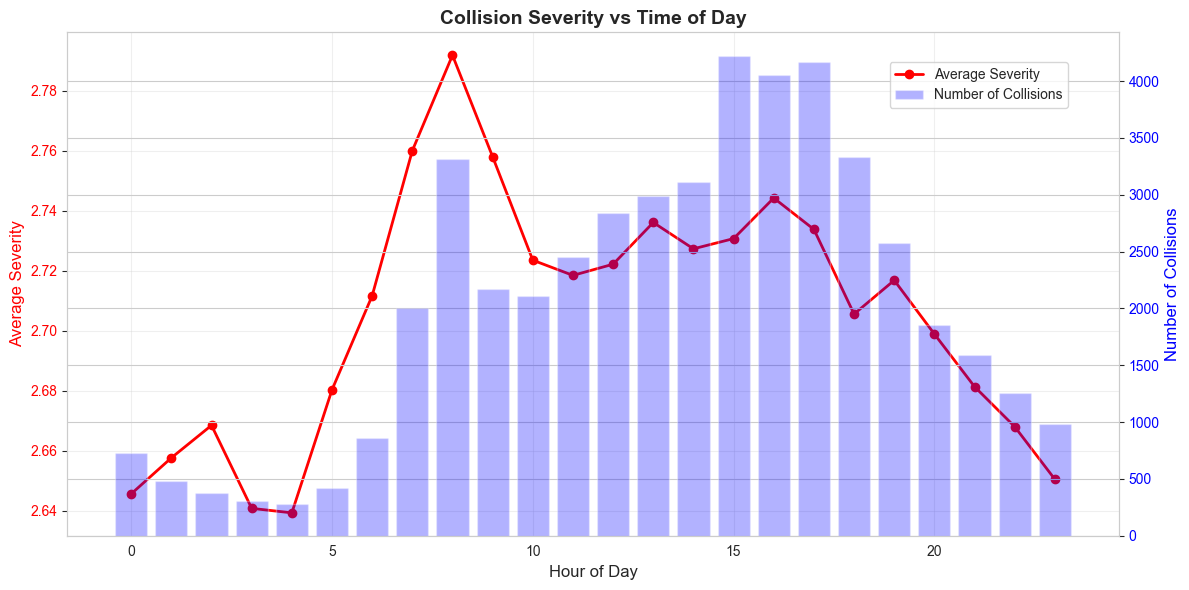

In [ ]:
# calculating average severity and count for each hour of the day
# i want to see if certain hours are more dangerous
severity_by_hour_stats = df_collisions.groupby('hour_of_day')['collision_severity'].agg(['mean', 'count']).reset_index()
print(f"calculated severity statistics for {len(severity_by_hour_stats)} hours")
# above aggregates data by hour

# creating dual-axis plot to show both severity and volume
fig, axis_1 = plt.subplots(figsize=(12, 6))

# plotting average severity as a red line
axis_1.plot(severity_by_hour_stats['hour_of_day'], severity_by_hour_stats['mean'], 
         color='red', marker='o', linewidth=2, label='average severity')
axis_1.set_xlabel('hour of day (0-23)', fontsize=12)
axis_1.set_ylabel('average severity', fontsize=12, color='red')
axis_1.tick_params(axis='y', labelcolor='red')
axis_1.grid(True, alpha=0.3)

# adding secondary axis for collision count as blue bars
axis_2 = axis_1.twinx()
axis_2.bar(severity_by_hour_stats['hour_of_day'], severity_by_hour_stats['count'], 
        alpha=0.3, color='blue', label='number of collisions')
axis_2.set_ylabel('number of collisions', fontsize=12, color='blue')
axis_2.tick_params(axis='y', labelcolor='blue')

plt.title('collision severity and volume by time of day', fontsize=14, fontweight='bold')

fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))# above reveals temporal patterns in collision severity

plt.tight_layout()print("plot 3 completed: severity by hour of day")

save_fig('05_severity_by_hour.png')plt.show()

## Plot 4: Severity vs Day of Week

now i want to see if there are patterns across different days of the week. do weekends have different severity patterns than weekdays? i will create a grouped bar chart to compare severity distribution across all 7 days.

✓ Saved: images\06_severity_by_dayofweek.png


<Figure size 1200x600 with 0 Axes>

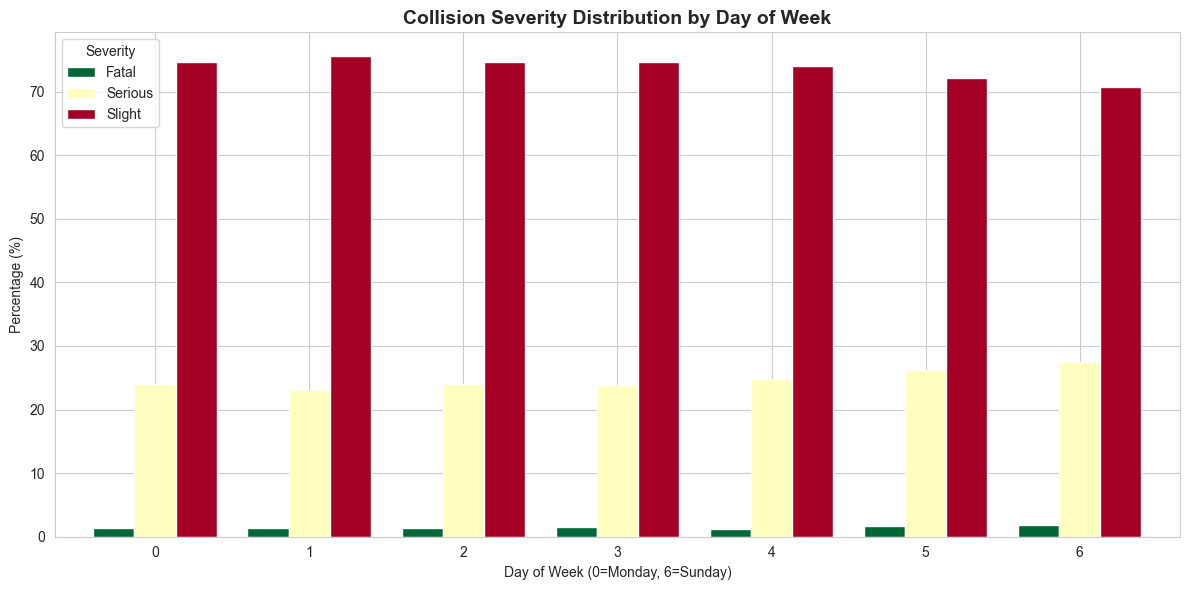

In [ ]:
# calculating severity distribution for each day of the week
# i am using crosstab with normalize to get percentages
severity_by_day_percentages = pd.crosstab(df_collisions['day_of_week'], df_collisions['collision_severity'], normalize='index') * 100
print("calculated severity percentage distribution by day of week")
# above creates percentage breakdown for each day

# creating grouped bar chart to compare days
plt.figure(figsize=(12, 6))
severity_by_day_percentages.plot(kind='bar', stacked=False, colormap='RdYlGn_r', width=0.8)
plt.title('collision severity distribution by day of week', fontsize=14, fontweight='bold')
plt.xlabel('day of week (0=monday, 6=sunday)')
plt.ylabel('percentage (%)')
plt.legend(title='severity', labels=['fatal', 'serious', 'slight'])

plt.xticks(rotation=0)# above shows if weekends differ from weekdays in severity patterns

plt.tight_layout()print("plot 4 completed: severity by day of week")

save_fig('06_severity_by_dayofweek.png')plt.show()

## Plot 5: Weather Impact on Severity

now i want to explore how weather affects collision severity. i will merge the collision data with daily weather data and create three subplots showing the impact of rain, temperature, and frost. this is important because weather might be a strong predictor.

✓ Saved: images\07_weather_impact.png


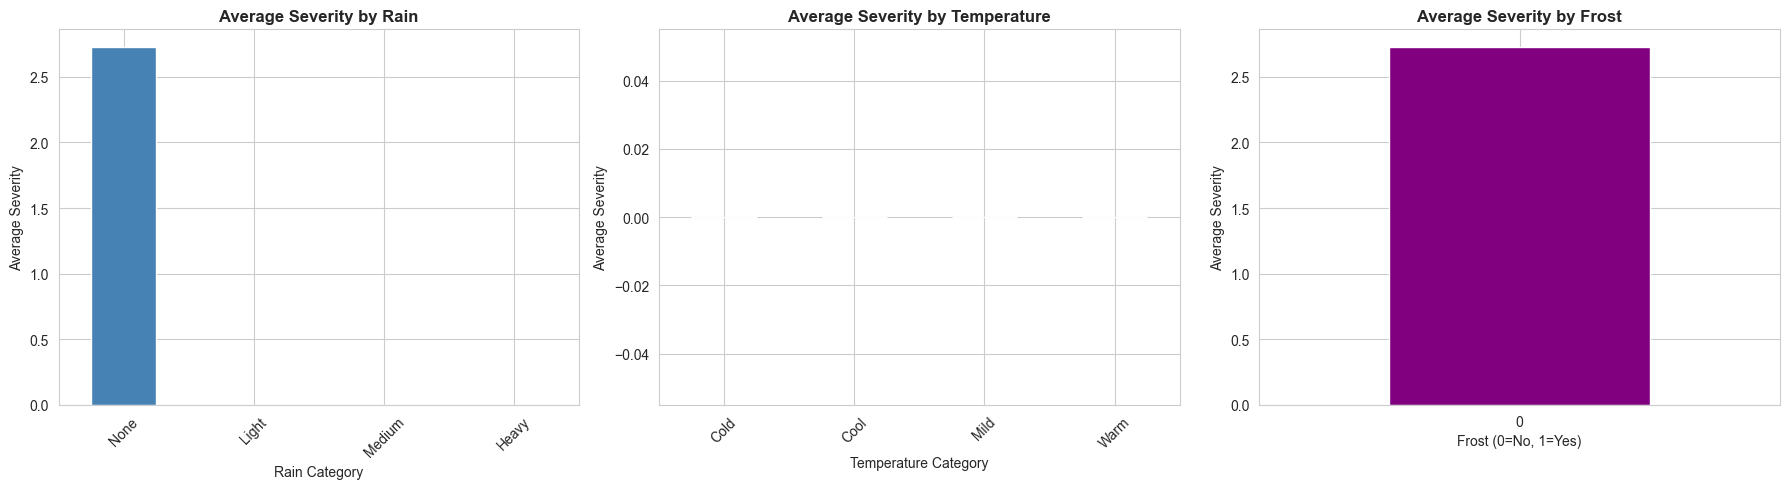

In [ ]:
# loading daily weather data from database
# i am filtering for heathrow station and dates from 2025 onwards
df_weather_data = pd.read_sql("""
    SELECT date, tmax, tmin, rain, af
    FROM weather_daily 
    WHERE station = 'heathrow' AND date >= '2025-01-01'
""", engine)
print(f"loaded {len(df_weather_data):,} daily weather records")
# above loads weather data for analysis

# converting date and weather columns to proper types
df_weather_data['date'] = pd.to_datetime(df_weather_data['date'])
df_weather_data['temperature_mean'] = (pd.to_numeric(df_weather_data['tmax'], errors='coerce') + 
                        pd.to_numeric(df_weather_data['tmin'], errors='coerce')) / 2
df_weather_data['rainfall_mm'] = pd.to_numeric(df_weather_data['rain'], errors='coerce')
df_weather_data['frost_days'] = pd.to_numeric(df_weather_data['af'], errors='coerce')
print("calculated mean temperature and converted weather variables")
# above prepares weather data for merging

# merging weather data with collision data by date
df_collisions_with_weather = df_collisions.merge(df_weather_data[['date', 'temperature_mean', 'rainfall_mm', 'frost_days']], on='date', how='left')
print(f"merged weather data with {len(df_collisions_with_weather):,} collision records")
# above creates combined dataset with weather information

# creating rainfall categories for better visualization
# categorizing as none, light, medium, or heavy rain
df_collisions_with_weather['rain_category'] = pd.cut(df_collisions_with_weather['rainfall_mm'].fillna(0), 
                                      bins=[-0.1, 0, 5, 15, 100],
                                      labels=['none', 'light', 'medium', 'heavy'])
print("created rain categories: none, light, medium, heavy")
# above bins rainfall into meaningful categories

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Rain impact
severity_by_rain = df_weather.groupby('rain_category')['collision_severity'].mean()
severity_by_rain.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Average Severity by Rain', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Rain Category')
axes[0].set_ylabel('Average Severity')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Temperature impact
df_weather['temp_category'] = pd.cut(df_weather['temp_mean'], 
                                      bins=[-100, 0, 10, 20, 100],
                                      labels=['Cold', 'Cool', 'Mild', 'Warm'])
severity_by_temp = df_weather.groupby('temp_category')['collision_severity'].mean()
severity_by_temp.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Average Severity by Temperature', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Temperature Category')
axes[1].set_ylabel('Average Severity')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


# Frost impactplt.show()

df_weather['is_frost'] = (df_weather['frost_days'] > 0).astype(int)save_fig('07_weather_impact.png')

severity_by_frost = df_weather.groupby('is_frost')['collision_severity'].mean()plt.tight_layout()

severity_by_frost.plot(kind='bar', ax=axes[2], color='purple')

axes[2].set_title('Average Severity by Frost', fontsize=12, fontweight='bold')axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)

axes[2].set_xlabel('Frost (0=No, 1=Yes)')axes[2].set_ylabel('Average Severity')

## Plot 6: Urban vs Rural Severity

✓ Saved: images\08_urban_rural_severity.png


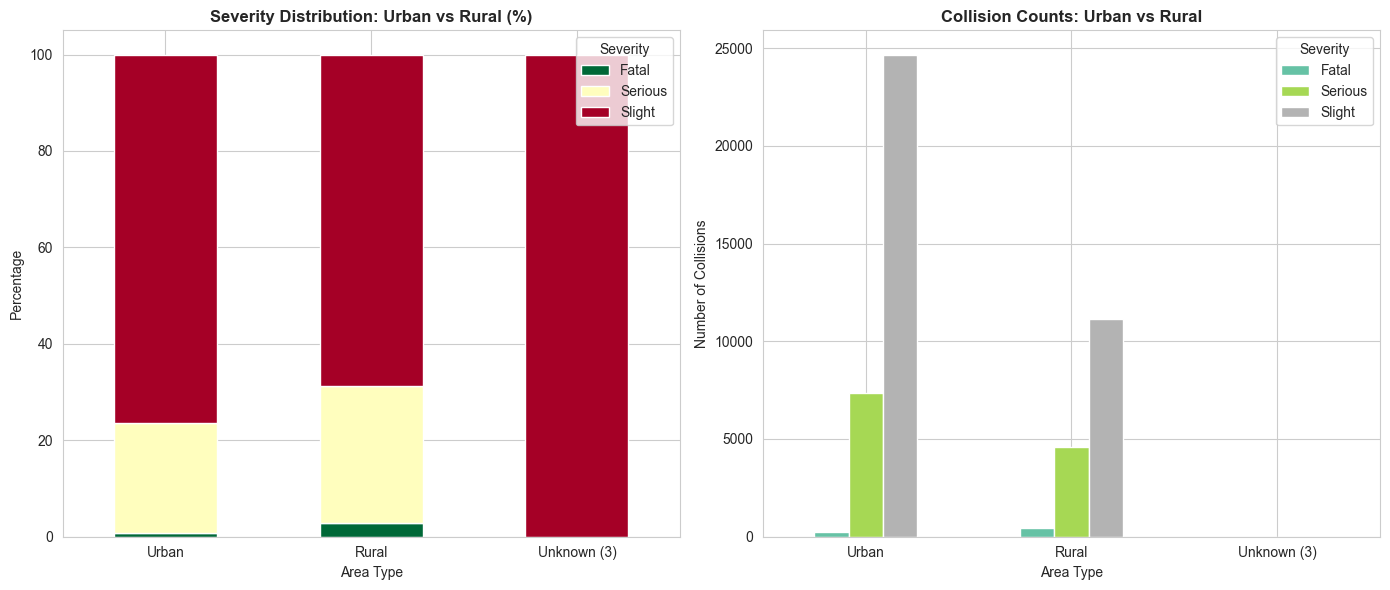

In [9]:
# Urban vs Rural comparison
urban_rural = pd.crosstab(df['urban_or_rural_area'], df['collision_severity'], normalize='index') * 100

# Map numeric codes to labels
area_labels = {1: 'Urban', 2: 'Rural'}
urban_rural.index = urban_rural.index.map(lambda x: area_labels.get(x, f'Unknown ({x})'))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Stacked bar chart
urban_rural.plot(kind='bar', stacked=True, ax=axes[0], colormap='RdYlGn_r')
axes[0].set_title('Severity Distribution: Urban vs Rural (%)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Area Type')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Severity', labels=['Fatal', 'Serious', 'Slight'])
axes[0].tick_params(axis='x', rotation=0)

# Count comparison
counts = df.groupby(['urban_or_rural_area', 'collision_severity']).size().unstack()
counts.index = counts.index.map(lambda x: area_labels.get(x, f'Unknown ({x})'))
counts.plot(kind='bar', ax=axes[1], colormap='Set2')
axes[1].set_title('Collision Counts: Urban vs Rural', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Area Type')
axes[1].set_ylabel('Number of Collisions')
axes[1].legend(title='Severity', labels=['Fatal', 'Serious', 'Slight'])
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
save_fig('08_urban_rural_severity.png')
plt.show()

## Plot 7: Correlation Heatmap

✓ Saved: images\09_correlation_heatmap.png


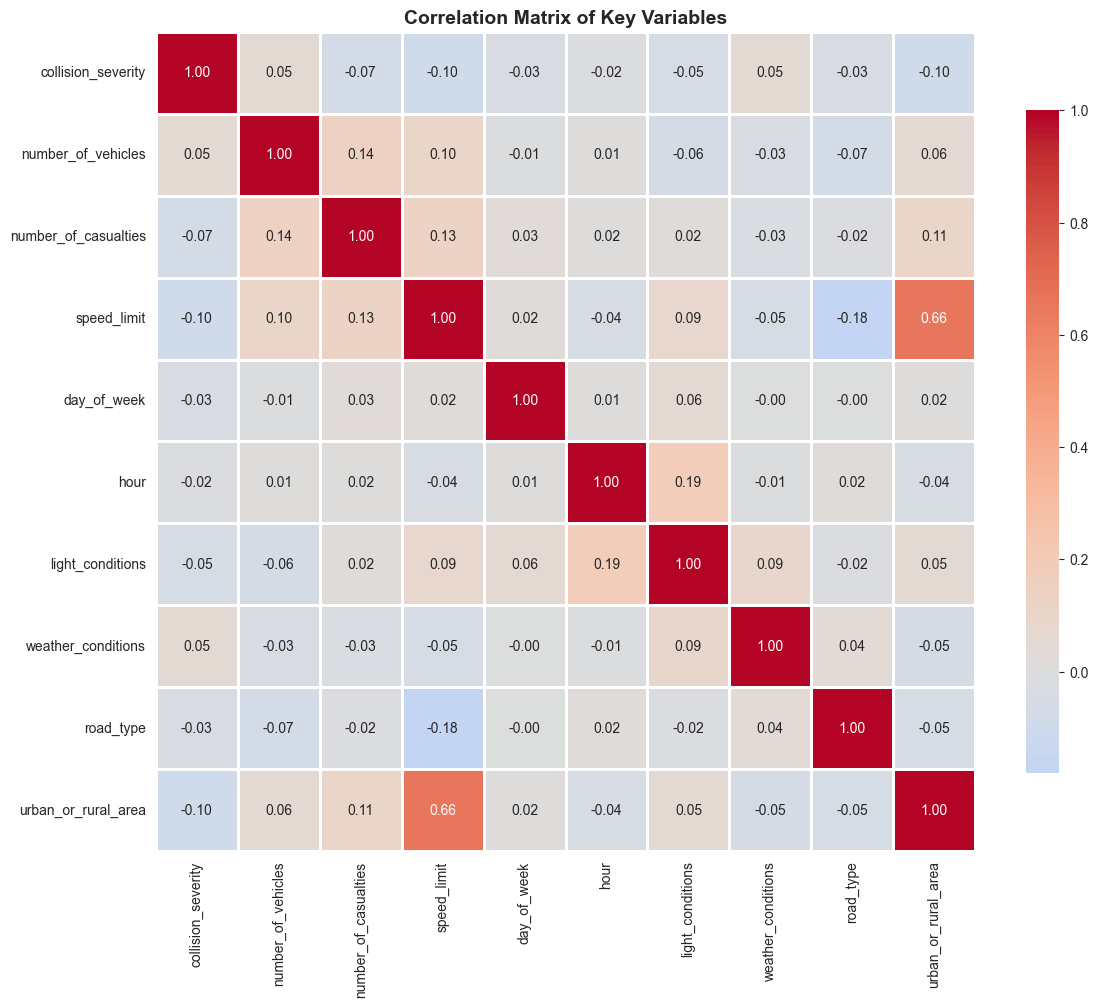

In [10]:
# Select numeric columns for correlation
numeric_cols = ['collision_severity', 'number_of_vehicles', 'number_of_casualties',
                'speed_limit', 'day_of_week', 'hour', 'light_conditions', 
                'weather_conditions', 'road_type', 'urban_or_rural_area']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Key Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
save_fig('09_correlation_heatmap.png')
plt.show()

## Summary

In [11]:
print("\n" + "="*60)
print("✓ SECTION E (EDA & VISUALIZATION) COMPLETE!")
print("="*60)
print("\nGenerated 7 required plots in images/ directory:")
print("  ✓ images/03_vehicles_vs_severity.png")
print("  ✓ images/04_casualties_vs_severity.png")
print("  ✓ images/05_severity_by_hour.png")
print("  ✓ images/06_severity_by_dayofweek.png")
print("  ✓ images/07_weather_impact.png")
print("  ✓ images/08_urban_rural_severity.png")
print("  ✓ images/09_correlation_heatmap.png")
print("="*60)


✓ SECTION E (EDA & VISUALIZATION) COMPLETE!

Generated 7 required plots in images/ directory:
  ✓ images/03_vehicles_vs_severity.png
  ✓ images/04_casualties_vs_severity.png
  ✓ images/05_severity_by_hour.png
  ✓ images/06_severity_by_dayofweek.png
  ✓ images/07_weather_impact.png
  ✓ images/08_urban_rural_severity.png
  ✓ images/09_correlation_heatmap.png
